In [39]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('phishing_data.csv')

In [82]:
class1 = data[data['CLASS_LABEL'] == 0] #Class one, I believe, describes phishing websites; '0' corresponds to 
#'False' and the original csv was named 'Legitimate websites' - This is my reasoning
class2 = data[data['CLASS_LABEL'] == 1]
labels = data.columns
class_index = data.set_index('CLASS_LABEL')
print(class_index)
print(labels)
print(class1.describe())
print(class2.describe())
print(class1.info())
print(class2.info())
#There don't appear to be any null values and most columns are ints, some are floats (largely those that are
#percentages)

                id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
CLASS_LABEL                                                                  
1                1        3               1          5         72        0   
1                2        3               1          3        144        0   
1                3        3               1          2         58        0   
1                4        3               1          6         79        1   
1                5        3               0          4         46        0   
...            ...      ...             ...        ...        ...      ...   
0             9996        3               1          1         50        0   
0             9997        2               1          4         59        1   
0             9998        2               1          4         57        0   
0             9999        3               1          1         49        0   
0            10000        3               1          2         5

<AxesSubplot:ylabel='Frequency'>

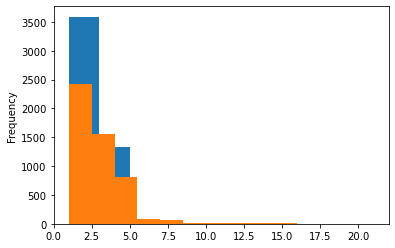

In [55]:
class1['NumDots'].plot.hist()
class2['NumDots'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

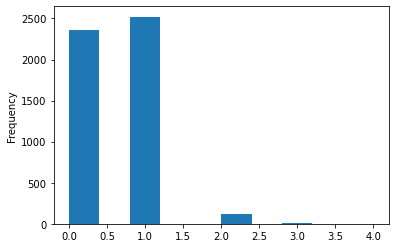

In [57]:
class1['SubdomainLevel'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

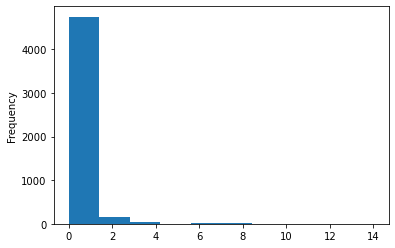

In [58]:
class2['SubdomainLevel'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

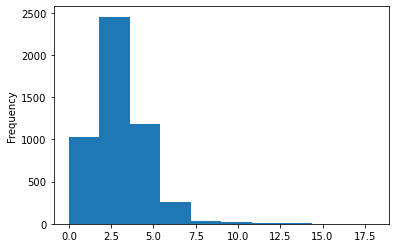

In [59]:
class1['PathLevel'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

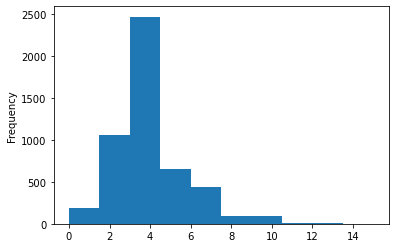

In [60]:
class2['PathLevel'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

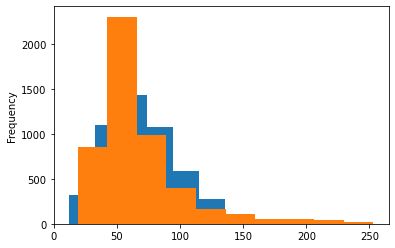

In [62]:
class1['UrlLength'].plot.hist()
class2['UrlLength'].plot.hist()
#In a few histographs of columns, comparing class1 with class2, there are already some clear differences between
#the sets of website. It seems like it will be possible, from a data comparison, to determine to which category
#a given website more than likely belongs.

In [74]:
class1['AtSymbol'].describe()
#It looks like the existence of an at symbol, while still rare, is a red flag to describe a phishing website.

count    5000.00000
mean        0.00060
std         0.02449
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: AtSymbol, dtype: float64

In [72]:
class2['AtSymbol'].describe()
#It seems like in 5,000 instances of legitimate websites, an at symbol is never included. The boolean values in this set
#can likely be used similarly - as pure red flags, or just as things that infrequently happen together or alone
#within a legitimate website.

count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: AtSymbol, dtype: float64

In [140]:
data_count = data['AtSymbol'].value_counts()
print(data_count)
boolean_list = []
for i in labels:
    if len(data[i].value_counts()) == 2:
        print(i, " is boolean")
        boolean_list.append(i)
boolean_df = data[boolean_list]
print(boolean_df)
#The above shows me which columns only contain two possible values, indicating tentatively that
#they represent boolean expressions - this seems to track with the names of the columns, with the
#possible exception of 'NumHash' which, I thought meant number of hashes - it's possible there are just
#only two recorded responses.

0    9997
1       3
Name: AtSymbol, dtype: int64
AtSymbol  is boolean
TildeSymbol  is boolean
NumHash  is boolean
NoHttps  is boolean
RandomString  is boolean
IpAddress  is boolean
DomainInSubdomains  is boolean
DomainInPaths  is boolean
DoubleSlashInPath  is boolean
EmbeddedBrandName  is boolean
ExtFavicon  is boolean
InsecureForms  is boolean
RelativeFormAction  is boolean
ExtFormAction  is boolean
AbnormalFormAction  is boolean
FrequentDomainNameMismatch  is boolean
FakeLinkInStatusBar  is boolean
RightClickDisabled  is boolean
PopUpWindow  is boolean
SubmitInfoToEmail  is boolean
IframeOrFrame  is boolean
MissingTitle  is boolean
ImagesOnlyInForm  is boolean
CLASS_LABEL  is boolean
      AtSymbol  TildeSymbol  NumHash  NoHttps  RandomString  IpAddress  \
0            0            0        0        1             0          0   
1            0            0        0        1             0          0   
2            0            0        0        1             0          0   
3        

In [141]:
print(data['PctExtHyperlinks'].describe())
print(data['PctExtResourceUrls'].max())
#Getting an idea of the range of values contained in a 'pct' column

count    10000.000000
mean         0.241334
std          0.342370
min          0.000000
25%          0.000000
50%          0.071429
75%          0.315874
max          1.000000
Name: PctExtHyperlinks, dtype: float64
1.0


In [142]:
unique_list = []
for i in labels:
    if len(data[i].unique()) > 10:
        print(i, " has more than 10 unique values")
        unique_list.append(i)
unique_df = data[unique_list]
print(unique_df)
#This creates a dataframe containing columns with at least 10 unique values, since so many of the columns 
#are booleans or contain very few unique values.
#Note: I believe some columns are still not contained in either the unique_list or the boolean_list

id  has more than 10 unique values
NumDots  has more than 10 unique values
SubdomainLevel  has more than 10 unique values
PathLevel  has more than 10 unique values
UrlLength  has more than 10 unique values
NumDash  has more than 10 unique values
NumUnderscore  has more than 10 unique values
NumPercent  has more than 10 unique values
NumQueryComponents  has more than 10 unique values
NumAmpersand  has more than 10 unique values
NumNumericChars  has more than 10 unique values
HostnameLength  has more than 10 unique values
PathLength  has more than 10 unique values
QueryLength  has more than 10 unique values
PctExtHyperlinks  has more than 10 unique values
PctExtResourceUrls  has more than 10 unique values
PctNullSelfRedirectHyperlinks  has more than 10 unique values
         id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3 

In [145]:
print(data['PctExtResourceUrlsRT'].unique())
print(data['PctExtNullSelfRedirectHyperlinksRT'].unique())
#It seems that the 'Pct' columns which are not floats contain only these three results:

[ 1 -1  0]
[ 1  0 -1]


In [147]:
#Meanwhile the other 'Pct' contain many unique values - I'm thus not sure what to make of the non-float columns.
print(len(data['PctNullSelfRedirectHyperlinks'].unique()))

1311


In [ ]:
#I might have to drop these int 'Pct's barring an explanation being found - 
#From a reading of the column names, I had assumed they would represent percentages but am now unsure how to interpret.